In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [119]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_dict = pd.read_csv('train_data_dict.csv')
samp = pd.read_csv('sample_submission_lfbv3c3.csv')

In [120]:
train.shape, test.shape

((318438, 18), (137057, 17))

In [121]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [123]:
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [124]:
test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [125]:
train['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

### Basic EDA and insights

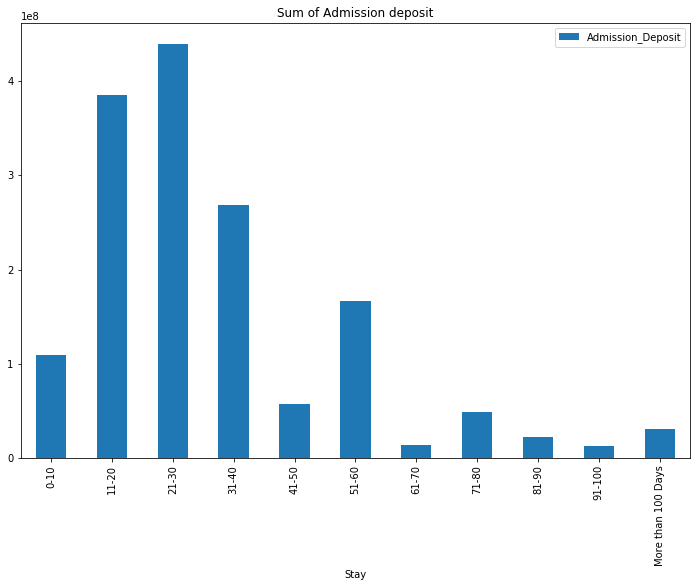

In [126]:
plt.rcParams["figure.figsize"] = 12, 8
sum_ad_deposit = train.groupby("Stay").agg({"Admission_Deposit": "sum"})
sum_ad_deposit.plot(kind = "bar")
plt.title("Sum of Admission deposit")
plt.show()

We can clearly see that the Admission Deposits are very high for certain classes (11-20, 21-30, 31-40)and low for others. Lets check if the classes count has something to do with this.

In [127]:
train['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

Yes, the classes count is affecting the admission deposit because as the classes count are more for the above 3 classes (11-20, 21-30, 31-40), the admission deposits also increase with it.

Lets now check how Visitors with Patients affects the Stay variable

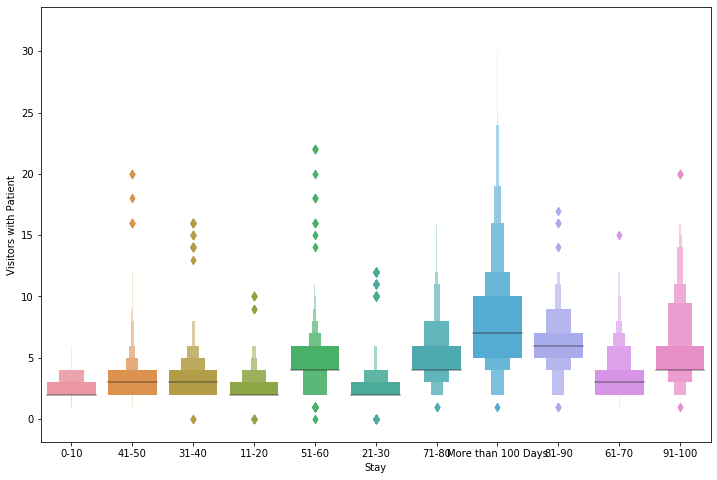

In [128]:
sns.boxenplot(train["Stay"], train["Visitors with Patient"])

As expected as the stay increases the visitors with patient also increases.

### Feature Engineering

In [208]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
train['Stay'] = le.fit_transform(train['Stay'])

In [209]:
train['Stay'].value_counts()

2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

In [129]:
train['train_flag'] = 1
test['train_flag'] = 0
test['Stay'] = None
print(train.shape, test.shape)

data = pd.concat((train, test))
print(data.shape)

(318438, 19) (137057, 19)


C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(455495, 19)


In [130]:
data.shape

(455495, 19)

In [131]:
data.drop(['case_id','patientid'],axis=1,inplace=True)

In [132]:
data.isnull().sum()

Admission_Deposit                         0
Age                                       0
Available Extra Rooms in Hospital         0
Bed Grade                               148
City_Code_Hospital                        0
City_Code_Patient                      6689
Department                                0
Hospital_code                             0
Hospital_region_code                      0
Hospital_type_code                        0
Severity of Illness                       0
Stay                                 137057
Type of Admission                         0
Visitors with Patient                     0
Ward_Facility_Code                        0
Ward_Type                                 0
train_flag                                0
dtype: int64

As we see that our dataset does have some Nan values which we can treat by simply imputing the "median" of the column. Though the column is a float, I still consider it as a category hence the imputation is a median.

In [133]:
from sklearn.impute import SimpleImputer

simple_Impute_median = SimpleImputer(missing_values=np.nan, strategy='median')
data["Bed Grade"] = simple_Impute_median.fit_transform(data[["Bed Grade"]]).ravel()
data["City_Code_Patient"] = simple_Impute_median.fit_transform(data[["City_Code_Patient"]]).ravel()

In [134]:
data.isnull().sum()

Admission_Deposit                         0
Age                                       0
Available Extra Rooms in Hospital         0
Bed Grade                                 0
City_Code_Hospital                        0
City_Code_Patient                         0
Department                                0
Hospital_code                             0
Hospital_region_code                      0
Hospital_type_code                        0
Severity of Illness                       0
Stay                                 137057
Type of Admission                         0
Visitors with Patient                     0
Ward_Facility_Code                        0
Ward_Type                                 0
train_flag                                0
dtype: int64

In [135]:
data.shape

(455495, 17)

In [136]:
data.columns

Index(['Admission_Deposit', 'Age', 'Available Extra Rooms in Hospital',
       'Bed Grade', 'City_Code_Hospital', 'City_Code_Patient', 'Department',
       'Hospital_code', 'Hospital_region_code', 'Hospital_type_code',
       'Severity of Illness', 'Stay', 'Type of Admission',
       'Visitors with Patient', 'Ward_Facility_Code', 'Ward_Type',
       'train_flag'],
      dtype='object')

Now that our dataset is clear with no Nan Values, we can concentrate on getting the "object" dtype to numbers. For this we will use LabelEncoder, we can also use various other techniques like Onehotecoding, pandas.dummies etc but for now we will go with the basic.

In [137]:
cat=data.select_dtypes(['object']).columns
cat

Index(['Age', 'Department', 'Hospital_region_code', 'Hospital_type_code',
       'Severity of Illness', 'Stay', 'Type of Admission',
       'Ward_Facility_Code', 'Ward_Type'],
      dtype='object')

In [138]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()

In [139]:
data['Age'] = le.fit_transform(data['Age'])
data['Department'] = le.fit_transform(data['Department'])
data['Hospital_region_code'] = le.fit_transform(data['Hospital_region_code'])
data['Hospital_type_code'] = le.fit_transform(data['Hospital_type_code'])
data['Severity of Illness'] = le.fit_transform(data['Severity of Illness'])
data['Type of Admission'] = le.fit_transform(data['Type of Admission'])
data['Ward_Facility_Code'] = le.fit_transform(data['Ward_Facility_Code'])
data['Ward_Type'] = le.fit_transform(data['Ward_Type'])

In [140]:
data = pd.get_dummies(data=data,columns=['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age'])

In [141]:
data.shape

(455495, 52)

In [142]:
data.head()

,Admission_Deposit,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Hospital_code,Stay,Visitors with Patient,train_flag,Hospital_type_code_0,...,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9
0,4911.0,3,2.0,3,7.0,8,0-10,2,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5954.0,2,2.0,5,7.0,2,41-50,2,1,0,...,0,0,0,0,0,1,0,0,0,0
2,4745.0,2,2.0,1,7.0,10,31-40,2,1,0,...,0,0,0,0,0,1,0,0,0,0
3,7272.0,2,2.0,2,7.0,26,41-50,2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5558.0,2,2.0,2,7.0,26,41-50,2,1,0,...,0,0,0,0,0,1,0,0,0,0


In [143]:
data.dtypes

Admission_Deposit                    float64
Available Extra Rooms in Hospital      int64
Bed Grade                            float64
City_Code_Hospital                     int64
City_Code_Patient                    float64
Hospital_code                          int64
Stay                                  object
Visitors with Patient                  int64
train_flag                             int64
Hospital_type_code_0                   uint8
Hospital_type_code_1                   uint8
Hospital_type_code_2                   uint8
Hospital_type_code_3                   uint8
Hospital_type_code_4                   uint8
Hospital_type_code_5                   uint8
Hospital_type_code_6                   uint8
Hospital_region_code_0                 uint8
Hospital_region_code_1                 uint8
Hospital_region_code_2                 uint8
Department_0                           uint8
Department_1                           uint8
Department_2                           uint8
Department

In [144]:
data.shape

(455495, 52)

In [145]:
train, test = data[data.train_flag == 1], data[data.train_flag == 0]

In [146]:
train.shape, test.shape

((318438, 52), (137057, 52))

In [147]:
test.drop(['Stay'], inplace=True, axis=1)

C:\Users\SHIVAM SINGH\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
train.shape,test.shape

((318438, 52), (137057, 51))

In [149]:
train.head()

,Admission_Deposit,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Hospital_code,Stay,Visitors with Patient,train_flag,Hospital_type_code_0,...,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9
0,4911.0,3,2.0,3,7.0,8,0-10,2,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5954.0,2,2.0,5,7.0,2,41-50,2,1,0,...,0,0,0,0,0,1,0,0,0,0
2,4745.0,2,2.0,1,7.0,10,31-40,2,1,0,...,0,0,0,0,0,1,0,0,0,0
3,7272.0,2,2.0,2,7.0,26,41-50,2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5558.0,2,2.0,2,7.0,26,41-50,2,1,0,...,0,0,0,0,0,1,0,0,0,0


In [150]:
train.columns

Index(['Admission_Deposit', 'Available Extra Rooms in Hospital', 'Bed Grade',
       'City_Code_Hospital', 'City_Code_Patient', 'Hospital_code', 'Stay',
       'Visitors with Patient', 'train_flag', 'Hospital_type_code_0',
       'Hospital_type_code_1', 'Hospital_type_code_2', 'Hospital_type_code_3',
       'Hospital_type_code_4', 'Hospital_type_code_5', 'Hospital_type_code_6',
       'Hospital_region_code_0', 'Hospital_region_code_1',
       'Hospital_region_code_2', 'Department_0', 'Department_1',
       'Department_2', 'Department_3', 'Department_4', 'Ward_Type_0',
       'Ward_Type_1', 'Ward_Type_2', 'Ward_Type_3', 'Ward_Type_4',
       'Ward_Type_5', 'Ward_Facility_Code_0', 'Ward_Facility_Code_1',
       'Ward_Facility_Code_2', 'Ward_Facility_Code_3', 'Ward_Facility_Code_4',
       'Ward_Facility_Code_5', 'Type of Admission_0', 'Type of Admission_1',
       'Type of Admission_2', 'Severity of Illness_0', 'Severity of Illness_1',
       'Severity of Illness_2', 'Age_0', 'Age_1', 'A

In [151]:
train['Stay'] = train['Stay'].astype(int)

ValueError: invalid literal for int() with base 10: '0-10'

In [152]:
test.head()

,Admission_Deposit,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Hospital_code,Visitors with Patient,train_flag,Hospital_type_code_0,Hospital_type_code_1,...,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9
0,3095.0,3,2.0,3,2.0,21,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,4018.0,2,2.0,4,2.0,29,4,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,4492.0,3,4.0,2,2.0,26,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4173.0,3,2.0,6,2.0,6,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4161.0,2,2.0,11,2.0,28,4,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [180]:
#define X and y
X = train.drop(['Stay', 'train_flag'],axis = 1)
y = train.Stay
test_X = test.drop(['train_flag'],axis = 1)

In [154]:
X.head()

,Admission_Deposit,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Hospital_code,Visitors with Patient,Hospital_type_code_0,Hospital_type_code_1,Hospital_type_code_2,...,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9
0,4911.0,3,2.0,3,7.0,8,2,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5954.0,2,2.0,5,7.0,2,2,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,4745.0,2,2.0,1,7.0,10,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7272.0,2,2.0,2,7.0,26,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5558.0,2,2.0,2,7.0,26,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [155]:
y.head()

0     0-10
1    41-50
2    31-40
3    41-50
4    41-50
Name: Stay, dtype: object

In [156]:
from sklearn.model_selection import train_test_split
import xgboost as xb
import lightgbm as lbm
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [157]:
#dividing data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=True)


In [100]:
#scaling the features
sc=StandardScaler()
X = sc.fit_transform(X)
#y=sc.transform(y)

In [66]:
#scaling the features
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_valid=sc.transform(X_valid)

In [106]:
train_dataset = Pool(data=X_train, label=y_train)

eval_dataset = Pool(data=X_valid, label=y_valid)
# initialising catboost classifier

model = CatBoostClassifier(eval_metric='Accuracy')

In [107]:
model.fit(train_dataset,eval_set=eval_dataset)

Learning rate set to 0.120629
0:	learn: 0.3755800	test: 0.3769313	best: 0.3769313 (0)	total: 278ms	remaining: 4m 37s
1:	learn: 0.3795486	test: 0.3802757	best: 0.3802757 (1)	total: 510ms	remaining: 4m 14s
2:	learn: 0.3797998	test: 0.3807625	best: 0.3807625 (2)	total: 768ms	remaining: 4m 15s
3:	learn: 0.3888832	test: 0.3903404	best: 0.3903404 (3)	total: 1.01s	remaining: 4m 11s
4:	learn: 0.3894838	test: 0.3907329	best: 0.3907329 (4)	total: 1.26s	remaining: 4m 11s
5:	learn: 0.3913445	test: 0.3919734	best: 0.3919734 (5)	total: 1.48s	remaining: 4m 5s
6:	learn: 0.3918901	test: 0.3929155	best: 0.3929155 (6)	total: 1.7s	remaining: 4m 1s
7:	learn: 0.3933503	test: 0.3936534	best: 0.3936534 (7)	total: 1.94s	remaining: 4m
8:	learn: 0.3931816	test: 0.3935278	best: 0.3936534 (7)	total: 2.19s	remaining: 4m 1s
9:	learn: 0.3943749	test: 0.3948782	best: 0.3948782 (9)	total: 2.44s	remaining: 4m 1s
10:	learn: 0.3946614	test: 0.3952079	best: 0.3952079 (10)	total: 2.67s	remaining: 3m 59s
11:	learn: 0.3942493

93:	learn: 0.4199843	test: 0.4190428	best: 0.4190428 (93)	total: 25s	remaining: 4m 1s
94:	learn: 0.4200079	test: 0.4188544	best: 0.4190428 (93)	total: 25.3s	remaining: 4m
95:	learn: 0.4200707	test: 0.4191841	best: 0.4191841 (95)	total: 25.5s	remaining: 4m
96:	learn: 0.4201570	test: 0.4193098	best: 0.4193098 (96)	total: 25.8s	remaining: 4m
97:	learn: 0.4202355	test: 0.4196395	best: 0.4196395 (97)	total: 26s	remaining: 3m 59s
98:	learn: 0.4203965	test: 0.4193412	best: 0.4196395 (97)	total: 26.3s	remaining: 3m 59s
99:	learn: 0.4204122	test: 0.4195767	best: 0.4196395 (97)	total: 26.6s	remaining: 3m 59s
100:	learn: 0.4205613	test: 0.4197337	best: 0.4197337 (100)	total: 26.9s	remaining: 3m 59s
101:	learn: 0.4206398	test: 0.4197023	best: 0.4197337 (100)	total: 27.1s	remaining: 3m 58s
102:	learn: 0.4207144	test: 0.4197808	best: 0.4197808 (102)	total: 27.4s	remaining: 3m 58s
103:	learn: 0.4208557	test: 0.4196552	best: 0.4197808 (102)	total: 27.7s	remaining: 3m 58s
104:	learn: 0.4210010	test: 0.

184:	learn: 0.4290167	test: 0.4259358	best: 0.4259358 (184)	total: 49.9s	remaining: 3m 39s
185:	learn: 0.4290795	test: 0.4259201	best: 0.4259358 (184)	total: 50.2s	remaining: 3m 39s
186:	learn: 0.4291462	test: 0.4256846	best: 0.4259358 (184)	total: 50.6s	remaining: 3m 39s
187:	learn: 0.4291973	test: 0.4256532	best: 0.4259358 (184)	total: 50.9s	remaining: 3m 39s
188:	learn: 0.4292444	test: 0.4255276	best: 0.4259358 (184)	total: 51.2s	remaining: 3m 39s
189:	learn: 0.4292875	test: 0.4257788	best: 0.4259358 (184)	total: 51.6s	remaining: 3m 39s
190:	learn: 0.4292287	test: 0.4257474	best: 0.4259358 (184)	total: 51.9s	remaining: 3m 39s
191:	learn: 0.4293229	test: 0.4258573	best: 0.4259358 (184)	total: 52.3s	remaining: 3m 39s
192:	learn: 0.4294014	test: 0.4260771	best: 0.4260771 (192)	total: 52.6s	remaining: 3m 39s
193:	learn: 0.4294014	test: 0.4259672	best: 0.4260771 (192)	total: 52.9s	remaining: 3m 39s
194:	learn: 0.4294249	test: 0.4260928	best: 0.4260928 (194)	total: 53.3s	remaining: 3m 40s

274:	learn: 0.4342650	test: 0.4275845	best: 0.4275845 (274)	total: 1m 22s	remaining: 3m 37s
275:	learn: 0.4342336	test: 0.4275217	best: 0.4275845 (274)	total: 1m 22s	remaining: 3m 36s
276:	learn: 0.4342493	test: 0.4276316	best: 0.4276316 (276)	total: 1m 23s	remaining: 3m 36s
277:	learn: 0.4344612	test: 0.4276473	best: 0.4276473 (277)	total: 1m 23s	remaining: 3m 36s
278:	learn: 0.4343788	test: 0.4278985	best: 0.4278985 (278)	total: 1m 23s	remaining: 3m 36s
279:	learn: 0.4343827	test: 0.4278200	best: 0.4278985 (278)	total: 1m 24s	remaining: 3m 36s
280:	learn: 0.4345123	test: 0.4279456	best: 0.4279456 (280)	total: 1m 24s	remaining: 3m 36s
281:	learn: 0.4345554	test: 0.4278043	best: 0.4279456 (280)	total: 1m 24s	remaining: 3m 36s
282:	learn: 0.4345986	test: 0.4280712	best: 0.4280712 (282)	total: 1m 25s	remaining: 3m 35s
283:	learn: 0.4346654	test: 0.4281183	best: 0.4281183 (283)	total: 1m 25s	remaining: 3m 35s
284:	learn: 0.4346771	test: 0.4280398	best: 0.4281183 (283)	total: 1m 25s	remain

364:	learn: 0.4381237	test: 0.4278985	best: 0.4286679 (340)	total: 1m 56s	remaining: 3m 22s
365:	learn: 0.4382257	test: 0.4279456	best: 0.4286679 (340)	total: 1m 56s	remaining: 3m 22s
366:	learn: 0.4382885	test: 0.4279770	best: 0.4286679 (340)	total: 1m 57s	remaining: 3m 22s
367:	learn: 0.4385515	test: 0.4279927	best: 0.4286679 (340)	total: 1m 57s	remaining: 3m 22s
368:	learn: 0.4384926	test: 0.4280398	best: 0.4286679 (340)	total: 1m 58s	remaining: 3m 21s
369:	learn: 0.4384730	test: 0.4280398	best: 0.4286679 (340)	total: 1m 58s	remaining: 3m 21s
370:	learn: 0.4385162	test: 0.4282125	best: 0.4286679 (340)	total: 1m 58s	remaining: 3m 21s
371:	learn: 0.4385280	test: 0.4281811	best: 0.4286679 (340)	total: 1m 59s	remaining: 3m 21s
372:	learn: 0.4385201	test: 0.4281183	best: 0.4286679 (340)	total: 1m 59s	remaining: 3m 20s
373:	learn: 0.4385437	test: 0.4281026	best: 0.4286679 (340)	total: 1m 59s	remaining: 3m 20s
374:	learn: 0.4385829	test: 0.4277729	best: 0.4286679 (340)	total: 2m	remaining:

454:	learn: 0.4421943	test: 0.4283539	best: 0.4289662 (416)	total: 2m 28s	remaining: 2m 57s
455:	learn: 0.4422846	test: 0.4283224	best: 0.4289662 (416)	total: 2m 28s	remaining: 2m 57s
456:	learn: 0.4422964	test: 0.4282753	best: 0.4289662 (416)	total: 2m 29s	remaining: 2m 57s
457:	learn: 0.4423081	test: 0.4280869	best: 0.4289662 (416)	total: 2m 29s	remaining: 2m 56s
458:	learn: 0.4423631	test: 0.4280712	best: 0.4289662 (416)	total: 2m 29s	remaining: 2m 56s
459:	learn: 0.4423513	test: 0.4281026	best: 0.4289662 (416)	total: 2m 30s	remaining: 2m 56s
460:	learn: 0.4424220	test: 0.4280084	best: 0.4289662 (416)	total: 2m 30s	remaining: 2m 56s
461:	learn: 0.4424495	test: 0.4283067	best: 0.4289662 (416)	total: 2m 30s	remaining: 2m 55s
462:	learn: 0.4425083	test: 0.4282753	best: 0.4289662 (416)	total: 2m 31s	remaining: 2m 55s
463:	learn: 0.4425594	test: 0.4281340	best: 0.4289662 (416)	total: 2m 31s	remaining: 2m 55s
464:	learn: 0.4425554	test: 0.4279927	best: 0.4289662 (416)	total: 2m 32s	remain

544:	learn: 0.4462179	test: 0.4287935	best: 0.4289662 (416)	total: 2m 59s	remaining: 2m 29s
545:	learn: 0.4462414	test: 0.4286522	best: 0.4289662 (416)	total: 2m 59s	remaining: 2m 29s
546:	learn: 0.4462100	test: 0.4289191	best: 0.4289662 (416)	total: 2m 59s	remaining: 2m 29s
547:	learn: 0.4462022	test: 0.4288406	best: 0.4289662 (416)	total: 3m	remaining: 2m 28s
548:	learn: 0.4462846	test: 0.4288877	best: 0.4289662 (416)	total: 3m	remaining: 2m 28s
549:	learn: 0.4463238	test: 0.4287307	best: 0.4289662 (416)	total: 3m	remaining: 2m 28s
550:	learn: 0.4463395	test: 0.4288563	best: 0.4289662 (416)	total: 3m 1s	remaining: 2m 27s
551:	learn: 0.4464181	test: 0.4288563	best: 0.4289662 (416)	total: 3m 1s	remaining: 2m 27s
552:	learn: 0.4464612	test: 0.4288092	best: 0.4289662 (416)	total: 3m 1s	remaining: 2m 27s
553:	learn: 0.4464416	test: 0.4289348	best: 0.4289662 (416)	total: 3m 2s	remaining: 2m 26s
554:	learn: 0.4464730	test: 0.4289819	best: 0.4289819 (554)	total: 3m 2s	remaining: 2m 26s
555:	

634:	learn: 0.4499509	test: 0.4290604	best: 0.4290918 (557)	total: 3m 29s	remaining: 2m
635:	learn: 0.4499470	test: 0.4290290	best: 0.4290918 (557)	total: 3m 29s	remaining: 2m
636:	learn: 0.4499784	test: 0.4290133	best: 0.4290918 (557)	total: 3m 30s	remaining: 1m 59s
637:	learn: 0.4499823	test: 0.4289348	best: 0.4290918 (557)	total: 3m 30s	remaining: 1m 59s
638:	learn: 0.4500294	test: 0.4289348	best: 0.4290918 (557)	total: 3m 30s	remaining: 1m 59s
639:	learn: 0.4500687	test: 0.4288406	best: 0.4290918 (557)	total: 3m 31s	remaining: 1m 58s
640:	learn: 0.4501629	test: 0.4289034	best: 0.4290918 (557)	total: 3m 31s	remaining: 1m 58s
641:	learn: 0.4503121	test: 0.4289819	best: 0.4290918 (557)	total: 3m 31s	remaining: 1m 58s
642:	learn: 0.4504573	test: 0.4289662	best: 0.4290918 (557)	total: 3m 32s	remaining: 1m 57s
643:	learn: 0.4505123	test: 0.4288563	best: 0.4290918 (557)	total: 3m 32s	remaining: 1m 57s
644:	learn: 0.4504534	test: 0.4289976	best: 0.4290918 (557)	total: 3m 32s	remaining: 1m 

724:	learn: 0.4532483	test: 0.4295001	best: 0.4296885 (720)	total: 4m 1s	remaining: 1m 31s
725:	learn: 0.4532679	test: 0.4294373	best: 0.4296885 (720)	total: 4m 1s	remaining: 1m 31s
726:	learn: 0.4533189	test: 0.4296100	best: 0.4296885 (720)	total: 4m 2s	remaining: 1m 30s
727:	learn: 0.4533582	test: 0.4296571	best: 0.4296885 (720)	total: 4m 2s	remaining: 1m 30s
728:	learn: 0.4533621	test: 0.4293745	best: 0.4296885 (720)	total: 4m 3s	remaining: 1m 30s
729:	learn: 0.4533700	test: 0.4292959	best: 0.4296885 (720)	total: 4m 3s	remaining: 1m 30s
730:	learn: 0.4534367	test: 0.4293745	best: 0.4296885 (720)	total: 4m 3s	remaining: 1m 29s
731:	learn: 0.4534642	test: 0.4294530	best: 0.4296885 (720)	total: 4m 4s	remaining: 1m 29s
732:	learn: 0.4534642	test: 0.4293587	best: 0.4296885 (720)	total: 4m 4s	remaining: 1m 29s
733:	learn: 0.4535270	test: 0.4294373	best: 0.4296885 (720)	total: 4m 4s	remaining: 1m 28s
734:	learn: 0.4535427	test: 0.4295786	best: 0.4296885 (720)	total: 4m 5s	remaining: 1m 28s

814:	learn: 0.4566241	test: 0.4292488	best: 0.4297670 (745)	total: 4m 33s	remaining: 1m 2s
815:	learn: 0.4566320	test: 0.4293587	best: 0.4297670 (745)	total: 4m 33s	remaining: 1m 1s
816:	learn: 0.4567419	test: 0.4291703	best: 0.4297670 (745)	total: 4m 33s	remaining: 1m 1s
817:	learn: 0.4567615	test: 0.4292017	best: 0.4297670 (745)	total: 4m 34s	remaining: 1m 1s
818:	learn: 0.4568871	test: 0.4293587	best: 0.4297670 (745)	total: 4m 34s	remaining: 1m
819:	learn: 0.4570481	test: 0.4292488	best: 0.4297670 (745)	total: 4m 34s	remaining: 1m
820:	learn: 0.4569696	test: 0.4292174	best: 0.4297670 (745)	total: 4m 35s	remaining: 1m
821:	learn: 0.4569421	test: 0.4293745	best: 0.4297670 (745)	total: 4m 35s	remaining: 59.7s
822:	learn: 0.4569225	test: 0.4294687	best: 0.4297670 (745)	total: 4m 35s	remaining: 59.3s
823:	learn: 0.4569107	test: 0.4296100	best: 0.4297670 (745)	total: 4m 36s	remaining: 59s
824:	learn: 0.4568832	test: 0.4294844	best: 0.4297670 (745)	total: 4m 36s	remaining: 58.7s
825:	learn

905:	learn: 0.4595996	test: 0.4295472	best: 0.4299083 (873)	total: 5m 6s	remaining: 31.8s
906:	learn: 0.4596624	test: 0.4295472	best: 0.4299083 (873)	total: 5m 6s	remaining: 31.5s
907:	learn: 0.4596703	test: 0.4294373	best: 0.4299083 (873)	total: 5m 7s	remaining: 31.1s
908:	learn: 0.4598194	test: 0.4293430	best: 0.4299083 (873)	total: 5m 7s	remaining: 30.8s
909:	learn: 0.4598351	test: 0.4295315	best: 0.4299083 (873)	total: 5m 7s	remaining: 30.4s
910:	learn: 0.4598351	test: 0.4294844	best: 0.4299083 (873)	total: 5m 8s	remaining: 30.1s
911:	learn: 0.4599136	test: 0.4297042	best: 0.4299083 (873)	total: 5m 8s	remaining: 29.8s
912:	learn: 0.4599607	test: 0.4295786	best: 0.4299083 (873)	total: 5m 8s	remaining: 29.4s
913:	learn: 0.4601021	test: 0.4295472	best: 0.4299083 (873)	total: 5m 9s	remaining: 29.1s
914:	learn: 0.4600785	test: 0.4295629	best: 0.4299083 (873)	total: 5m 9s	remaining: 28.8s
915:	learn: 0.4601452	test: 0.4294687	best: 0.4299083 (873)	total: 5m 10s	remaining: 28.5s
916:	lear

996:	learn: 0.4627988	test: 0.4292488	best: 0.4299240 (987)	total: 5m 38s	remaining: 1.02s
997:	learn: 0.4628499	test: 0.4293587	best: 0.4299240 (987)	total: 5m 38s	remaining: 679ms
998:	learn: 0.4628930	test: 0.4293273	best: 0.4299240 (987)	total: 5m 39s	remaining: 340ms
999:	learn: 0.4629912	test: 0.4295786	best: 0.4299240 (987)	total: 5m 39s	remaining: 0us

bestTest = 0.4299240045
bestIteration = 987

Shrink model to first 988 iterations.


In [108]:
model.get_best_score()

{'learn': {'Accuracy': 0.46299116781158, 'MultiClass': 1.3954481358552249},
 'validation': {'Accuracy': 0.429924004522045,
  'MultiClass': 1.4967121731108712}}

In [109]:
test_X.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Department,Hospital_code,Hospital_region_code,Hospital_type_code,Severity of Illness,Type of Admission,Visitors with Patient,Ward_Facility_Code,Ward_Type
0,3095.0,7,3,2.0,3,2.0,2,21,2,2,2,0,2,0,3
1,4018.0,7,2,2.0,4,2.0,2,29,0,0,2,1,4,5,3
2,4492.0,7,3,4.0,2,2.0,2,26,1,1,2,0,3,3,1
3,4173.0,7,3,2.0,6,2.0,2,6,0,0,2,1,3,5,1
4,4161.0,7,2,2.0,11,2.0,2,28,0,1,2,1,4,5,2


In [110]:
test_X.columns

Index(['Admission_Deposit', 'Age', 'Available Extra Rooms in Hospital',
       'Bed Grade', 'City_Code_Hospital', 'City_Code_Patient', 'Department',
       'Hospital_code', 'Hospital_region_code', 'Hospital_type_code',
       'Severity of Illness', 'Type of Admission', 'Visitors with Patient',
       'Ward_Facility_Code', 'Ward_Type'],
      dtype='object')

In [111]:
test_dataset=Pool(test_X)

In [112]:
y_prediction=model.predict(test_dataset)

In [113]:
y_prediction

array([['0-10'],
       ['51-60'],
       ['21-30'],
       ...,
       ['11-20'],
       ['11-20'],
       ['51-60']], dtype=object)

In [114]:
y_prediction = y_prediction.flatten()

In [115]:
y_prediction.shape

(137057,)

In [116]:
sample = pd.DataFrame({'case_id': samp.case_id, 'Stay': y_prediction})

In [117]:
sample.to_csv('CatBoost_sample.csv', index=False)

In [158]:
# preparing train and validation data 

train_dataset = Pool(data=X_train, label=y_train)

eval_dataset = Pool(data=X_test, label=y_test)

In [162]:
eval_dataset.shape

(95532, 50)

In [159]:
# initialising catboost classifier

model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.07,
                           depth=7,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

In [161]:
# fitting the model

model.fit(train_dataset)

0:	learn: 0.3731573	total: 596ms	remaining: 9m 55s
1:	learn: 0.3832692	total: 1.05s	remaining: 8m 42s
2:	learn: 0.3846330	total: 1.55s	remaining: 8m 35s
3:	learn: 0.3892224	total: 2.02s	remaining: 8m 23s
4:	learn: 0.3899088	total: 2.5s	remaining: 8m 18s
5:	learn: 0.3903888	total: 2.97s	remaining: 8m 12s
6:	learn: 0.3916135	total: 3.44s	remaining: 8m 7s
7:	learn: 0.3918333	total: 3.98s	remaining: 8m 13s
8:	learn: 0.3932824	total: 4.51s	remaining: 8m 16s
9:	learn: 0.3927530	total: 5.01s	remaining: 8m 15s
10:	learn: 0.3936592	total: 5.53s	remaining: 8m 17s
11:	learn: 0.3949782	total: 6.07s	remaining: 8m 19s
12:	learn: 0.3968534	total: 6.54s	remaining: 8m 16s
13:	learn: 0.3969655	total: 7.03s	remaining: 8m 15s
14:	learn: 0.3973110	total: 7.53s	remaining: 8m 14s
15:	learn: 0.3972482	total: 8.01s	remaining: 8m 12s
16:	learn: 0.3979570	total: 8.48s	remaining: 8m 10s
17:	learn: 0.3982441	total: 8.94s	remaining: 8m 7s
18:	learn: 0.3989888	total: 9.4s	remaining: 8m 5s
19:	learn: 0.3992400	total:

158:	learn: 0.4262469	total: 1m 16s	remaining: 6m 46s
159:	learn: 0.4263187	total: 1m 17s	remaining: 6m 45s
160:	learn: 0.4264533	total: 1m 17s	remaining: 6m 45s
161:	learn: 0.4264623	total: 1m 18s	remaining: 6m 45s
162:	learn: 0.4266372	total: 1m 18s	remaining: 6m 44s
163:	learn: 0.4268885	total: 1m 19s	remaining: 6m 43s
164:	learn: 0.4270903	total: 1m 19s	remaining: 6m 43s
165:	learn: 0.4270948	total: 1m 20s	remaining: 6m 42s
166:	learn: 0.4271307	total: 1m 20s	remaining: 6m 42s
167:	learn: 0.4272922	total: 1m 21s	remaining: 6m 42s
168:	learn: 0.4273057	total: 1m 21s	remaining: 6m 41s
169:	learn: 0.4273685	total: 1m 22s	remaining: 6m 40s
170:	learn: 0.4275524	total: 1m 22s	remaining: 6m 40s
171:	learn: 0.4277453	total: 1m 23s	remaining: 6m 39s
172:	learn: 0.4277453	total: 1m 23s	remaining: 6m 39s
173:	learn: 0.4278799	total: 1m 24s	remaining: 6m 38s
174:	learn: 0.4279158	total: 1m 24s	remaining: 6m 38s
175:	learn: 0.4279472	total: 1m 24s	remaining: 6m 37s
176:	learn: 0.4282254	total:

311:	learn: 0.4371304	total: 2m 29s	remaining: 5m 30s
312:	learn: 0.4371933	total: 2m 30s	remaining: 5m 29s
313:	learn: 0.4372291	total: 2m 30s	remaining: 5m 29s
314:	learn: 0.4373323	total: 2m 31s	remaining: 5m 28s
315:	learn: 0.4372561	total: 2m 31s	remaining: 5m 28s
316:	learn: 0.4372471	total: 2m 32s	remaining: 5m 27s
317:	learn: 0.4373099	total: 2m 32s	remaining: 5m 27s
318:	learn: 0.4376105	total: 2m 33s	remaining: 5m 27s
319:	learn: 0.4376508	total: 2m 33s	remaining: 5m 26s
320:	learn: 0.4376598	total: 2m 34s	remaining: 5m 26s
321:	learn: 0.4377181	total: 2m 34s	remaining: 5m 25s
322:	learn: 0.4377899	total: 2m 35s	remaining: 5m 24s
323:	learn: 0.4378841	total: 2m 35s	remaining: 5m 24s
324:	learn: 0.4380860	total: 2m 35s	remaining: 5m 23s
325:	learn: 0.4380995	total: 2m 36s	remaining: 5m 23s
326:	learn: 0.4381129	total: 2m 36s	remaining: 5m 23s
327:	learn: 0.4382071	total: 2m 37s	remaining: 5m 22s
328:	learn: 0.4382744	total: 2m 37s	remaining: 5m 22s
329:	learn: 0.4383597	total:

464:	learn: 0.4447704	total: 3m 42s	remaining: 4m 16s
465:	learn: 0.4448736	total: 3m 43s	remaining: 4m 15s
466:	learn: 0.4449050	total: 3m 43s	remaining: 4m 15s
467:	learn: 0.4449544	total: 3m 44s	remaining: 4m 14s
468:	learn: 0.4450665	total: 3m 44s	remaining: 4m 14s
469:	learn: 0.4451518	total: 3m 45s	remaining: 4m 14s
470:	learn: 0.4451652	total: 3m 45s	remaining: 4m 13s
471:	learn: 0.4452639	total: 3m 46s	remaining: 4m 13s
472:	learn: 0.4453806	total: 3m 46s	remaining: 4m 12s
473:	learn: 0.4454299	total: 3m 47s	remaining: 4m 12s
474:	learn: 0.4456632	total: 3m 47s	remaining: 4m 11s
475:	learn: 0.4456767	total: 3m 48s	remaining: 4m 11s
476:	learn: 0.4457170	total: 3m 48s	remaining: 4m 10s
477:	learn: 0.4457753	total: 3m 48s	remaining: 4m 9s
478:	learn: 0.4458023	total: 3m 49s	remaining: 4m 9s
479:	learn: 0.4458561	total: 3m 49s	remaining: 4m 8s
480:	learn: 0.4458651	total: 3m 50s	remaining: 4m 8s
481:	learn: 0.4459234	total: 3m 50s	remaining: 4m 8s
482:	learn: 0.4459862	total: 3m 5

618:	learn: 0.4528456	total: 4m 57s	remaining: 3m 3s
619:	learn: 0.4528725	total: 4m 58s	remaining: 3m 2s
620:	learn: 0.4528546	total: 4m 58s	remaining: 3m 2s
621:	learn: 0.4529622	total: 4m 59s	remaining: 3m 1s
622:	learn: 0.4530609	total: 4m 59s	remaining: 3m 1s
623:	learn: 0.4530789	total: 5m	remaining: 3m
624:	learn: 0.4530609	total: 5m	remaining: 3m
625:	learn: 0.4531237	total: 5m 1s	remaining: 3m
626:	learn: 0.4531731	total: 5m 1s	remaining: 2m 59s
627:	learn: 0.4532269	total: 5m 2s	remaining: 2m 59s
628:	learn: 0.4533391	total: 5m 2s	remaining: 2m 58s
629:	learn: 0.4534064	total: 5m 3s	remaining: 2m 58s
630:	learn: 0.4533929	total: 5m 3s	remaining: 2m 57s
631:	learn: 0.4534647	total: 5m 4s	remaining: 2m 57s
632:	learn: 0.4535499	total: 5m 4s	remaining: 2m 56s
633:	learn: 0.4536352	total: 5m 5s	remaining: 2m 56s
634:	learn: 0.4536576	total: 5m 5s	remaining: 2m 55s
635:	learn: 0.4538326	total: 5m 5s	remaining: 2m 55s
636:	learn: 0.4539985	total: 5m 6s	remaining: 2m 54s
637:	learn:

772:	learn: 0.4605035	total: 6m 10s	remaining: 1m 48s
773:	learn: 0.4605304	total: 6m 11s	remaining: 1m 48s
774:	learn: 0.4604946	total: 6m 11s	remaining: 1m 47s
775:	learn: 0.4605529	total: 6m 12s	remaining: 1m 47s
776:	learn: 0.4605529	total: 6m 12s	remaining: 1m 47s
777:	learn: 0.4606695	total: 6m 13s	remaining: 1m 46s
778:	learn: 0.4606605	total: 6m 13s	remaining: 1m 46s
779:	learn: 0.4607189	total: 6m 14s	remaining: 1m 45s
780:	learn: 0.4606650	total: 6m 15s	remaining: 1m 45s
781:	learn: 0.4608400	total: 6m 15s	remaining: 1m 44s
782:	learn: 0.4608669	total: 6m 16s	remaining: 1m 44s
783:	learn: 0.4608669	total: 6m 16s	remaining: 1m 43s
784:	learn: 0.4609118	total: 6m 17s	remaining: 1m 43s
785:	learn: 0.4610329	total: 6m 17s	remaining: 1m 42s
786:	learn: 0.4610239	total: 6m 18s	remaining: 1m 42s
787:	learn: 0.4611226	total: 6m 18s	remaining: 1m 41s
788:	learn: 0.4613380	total: 6m 19s	remaining: 1m 41s
789:	learn: 0.4612438	total: 6m 19s	remaining: 1m 40s
790:	learn: 0.4612168	total:

926:	learn: 0.4675827	total: 7m 31s	remaining: 35.5s
927:	learn: 0.4676007	total: 7m 31s	remaining: 35s
928:	learn: 0.4676052	total: 7m 32s	remaining: 34.6s
929:	learn: 0.4678205	total: 7m 32s	remaining: 34.1s
930:	learn: 0.4678564	total: 7m 33s	remaining: 33.6s
931:	learn: 0.4679461	total: 7m 33s	remaining: 33.1s
932:	learn: 0.4679461	total: 7m 34s	remaining: 32.6s
933:	learn: 0.4680314	total: 7m 34s	remaining: 32.1s
934:	learn: 0.4680134	total: 7m 35s	remaining: 31.7s
935:	learn: 0.4681570	total: 7m 35s	remaining: 31.2s
936:	learn: 0.4682153	total: 7m 36s	remaining: 30.7s
937:	learn: 0.4682018	total: 7m 37s	remaining: 30.2s
938:	learn: 0.4682153	total: 7m 37s	remaining: 29.7s
939:	learn: 0.4682018	total: 7m 38s	remaining: 29.2s
940:	learn: 0.4683454	total: 7m 38s	remaining: 28.8s
941:	learn: 0.4683678	total: 7m 39s	remaining: 28.3s
942:	learn: 0.4683992	total: 7m 39s	remaining: 27.8s
943:	learn: 0.4685293	total: 7m 40s	remaining: 27.3s
944:	learn: 0.4685383	total: 7m 40s	remaining: 2

In [163]:
# accuracy

model.get_best_score()

{'learn': {'Accuracy': 0.4706827093034732, 'MultiClass': 1.378051593723568}}

In [164]:
# validation

eval_pred = model.predict(eval_dataset)

In [165]:
# confusion matrix

cm = confusion_matrix(y_test, eval_pred)
cm

array([[ 1190,  3348,  2425,    50,     6,    20,     0,     0,     0,
            0,     0],
       [  690, 11841,  9381,  1051,     4,   667,     2,     4,     3,
            0,     6],
       [  471,  7420, 17420,   419,     8,   335,     2,     8,    36,
            0,    32],
       [  275,  2772,  6687,  3873,    14,  2689,     3,    36,    25,
            2,    37],
       [  143,   586,  2237,   223,    10,   253,     1,     2,    16,
            2,    20],
       [  107,   786,  1494,  2272,     3,  5358,     3,    49,   234,
            2,   152],
       [   18,   104,   460,    78,     3,   154,     1,     7,    16,
            1,    26],
       [   46,   204,   302,   586,     3,  1669,     0,   103,    54,
            4,   198],
       [   14,    50,    82,   132,     1,   696,     2,    11,   278,
            2,   149],
       [   12,    57,    84,   117,     1,   399,     0,    11,     9,
           15,   121],
       [   20,    91,   105,   131,     4,   589,     1,    

In [166]:
# predictions on test data 

y_pred = model.predict(test_X)

In [167]:
y_pred

array([['0-10'],
       ['51-60'],
       ['21-30'],
       ...,
       ['21-30'],
       ['11-20'],
       ['51-60']], dtype=object)

In [168]:
y_pred = y_pred.flatten()

In [169]:
samp.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [170]:
y_pred

array(['0-10', '51-60', '21-30', ..., '21-30', '11-20', '51-60'],
      dtype=object)

In [171]:
submission = pd.DataFrame({'case_id': samp.case_id, 'Stay': y_pred})

In [172]:
submission.to_csv('submission_cat.csv', index=False)

In [187]:
clf1 = LGBMClassifier(boosting_type='gbdt', learning_rate=0.09, n_estimators=800, colsample_bytree=0.7, min_data_in_leaf=55,
                      min_child_samples=20, random_state=42,  n_jobs=-1, reg_alpha=1.6, reg_lambda=1.1, subsample=0.7,
                      objective='multiclass', silent=False)
clf1.fit(X,y)
pred=clf1.predict(test_X)

In [188]:
pred

array(['0-10', '51-60', '21-30', ..., '21-30', '11-20', '51-60'],
      dtype=object)

In [189]:
samp.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [38]:
import optuna
from optuna.samplers import TPESampler

In [43]:
def create_model(trial):
    max_depth = trial.suggest_int("max_depth", 2, 30)
    n_estimators = trial.suggest_int("n_estimators", 1, 500)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0000001, 1)
    num_leaves = trial.suggest_int("num_leaves", 2, 5000)
    min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, num_leaves=num_leaves, min_child_samples=min_child_samples,
                           random_state=0)
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

def optimize():
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)
    return study.best_params

params = optimize()

[I 2020-09-04 02:20:31,205] Trial 0 finished with value: 0.4097600803919106 and parameters: {'max_depth': 21, 'n_estimators': 425, 'learning_rate': 0.012067751024463187, 'num_leaves': 3866, 'min_child_samples': 28}. Best is trial 0 with value: 0.4097600803919106.
[I 2020-09-04 02:21:07,458] Trial 1 finished with value: 0.20916970229870618 and parameters: {'max_depth': 5, 'n_estimators': 173, 'learning_rate': 0.8741494938278576, 'num_leaves': 516, 'min_child_samples': 42}. Best is trial 0 with value: 0.4097600803919106.
[I 2020-09-04 02:22:50,089] Trial 2 finished with value: 0.21864087426202738 and parameters: {'max_depth': 13, 'n_estimators': 289, 'learning_rate': 0.7017923936595423, 'num_leaves': 2601, 'min_child_samples': 183}. Best is trial 0 with value: 0.4097600803919106.
[I 2020-09-04 02:23:58,968] Trial 3 finished with value: 0.21742243436754177 and parameters: {'max_depth': 8, 'n_estimators': 254, 'learning_rate': 0.6331795174572495, 'num_leaves': 1031, 'min_child_samples': 16

[I 2020-09-04 09:08:09,627] Trial 30 finished with value: 0.41012435623665366 and parameters: {'max_depth': 11, 'n_estimators': 145, 'learning_rate': 0.006282197954132013, 'num_leaves': 1269, 'min_child_samples': 110}. Best is trial 21 with value: 0.42971988443662856.
[I 2020-09-04 09:09:10,790] Trial 31 finished with value: 0.4293932922999623 and parameters: {'max_depth': 7, 'n_estimators': 248, 'learning_rate': 0.1203492351126558, 'num_leaves': 48, 'min_child_samples': 133}. Best is trial 21 with value: 0.42971988443662856.
[I 2020-09-04 09:09:52,815] Trial 32 finished with value: 0.4206004270820249 and parameters: {'max_depth': 4, 'n_estimators': 243, 'learning_rate': 0.06934182539428646, 'num_leaves': 78, 'min_child_samples': 141}. Best is trial 21 with value: 0.42971988443662856.
[I 2020-09-04 09:10:42,503] Trial 33 finished with value: 0.4281120462253486 and parameters: {'max_depth': 6, 'n_estimators': 223, 'learning_rate': 0.23142755344018884, 'num_leaves': 751, 'min_child_sampl

In [49]:
params['random_state'] = 666
model = LGBMClassifier(**params)
model.fit(X, y)
prediction = model.predict(test_X)
#print('LGBM accuracy: ', accuracy_score(y_test, prediction)*100, '%')

In [50]:
prediction

array(['0-10', '51-60', '21-30', ..., '21-30', '11-20', '51-60'],
      dtype=object)

In [51]:
submit_pred = pd.DataFrame({'case_id': samp.case_id, 'Stay': prediction})

In [52]:
submit_pred.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [53]:
submit_pred.to_csv('LGBM_Classifier.csv', index=False)

In [190]:
submit = pd.DataFrame({'case_id': samp.case_id, 'Stay': pred})

In [191]:
submit.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [192]:
submit.to_csv('submission_lgbt_S.csv', index=False)